## Part One:

I would utilise A/B testing to determine the effectiveness of using a professional photographer.

My first hypothesize test would ask whereever AirBnB listings with professional photography have a greater number of bookings than those without? I would control the number of bookings that each person would see to ensure there was no "bias" between the two datasets. For example, perhaps using a professional photographer is more expensive, so there may be less listings available.  

My second hypothesis would determine wherever bookings with a professional photographer actually charge more?

The third hypothesis would question wherever the increased charge resulted in less bookings? I would do this by showing the same listing to two sets of people at different prices to see if there's a percieved increase in "quality" due to the photography.

To ensure the test is fair we would need to ensure we accept variation may occur from constant:
- number of photos
- location
- city 
- time of day photos taken
- number of rooms
- number of guests

I would also utilise statistics to plot the distribution of the number of bookings relative to the overall price of the property and wherever there's a significant difference between professional photographed AirBnbs and non-professional. Ideally the data would be clustered and we could utilise KNN or DBEAMS to identifiy the distribution of the data.

### Part Two:

### Data Processing

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [224]:
df = pd.read_json('intervals_challenge.json', lines = True)

In [225]:
df

duration distance                    started_at  \
0           857     5384 2016-10-03 13:00:00.286999941   
1           245     1248 2016-10-03 13:00:00.852999926   
2          1249     5847 2016-10-03 13:00:01.670000076   
3           471     2585 2016-10-03 13:00:01.841000080   
4           182      743 2016-10-03 13:00:01.970000029   
...         ...      ...                           ...   
165165       NA       NA 2016-10-04 20:36:10.846999884   
165166       NA       NA 2016-10-04 20:36:12.719000101   
165167       NA       NA 2016-10-04 20:36:14.763000011   
165168       NA       NA 2016-10-04 20:36:15.957999945   
165169       NA       NA 2016-10-04 20:36:20.473999977   

                                 trip_id                        vehicle_id  \
0       c00cee6963e0dc66e50e271239426914  52d38cf1a3240d5cbdcf730f2d9a47d6   
1       427425e1f4318ca2461168bdd6e4fcbd  8336b28f24c3e7a1e3d582073b164895   
2       757867f6d7c00ef92a65bfaa3895943f  8885c59374cc539163e83f01ed59fd16   
3       d09d1301d361f7359d0d936557d10f89  81b63920454f70b6755a494e3b28b3a7   
4       00f20a701f0ec2519353ef3ffaf75068  b73030977cbad61c9db55418909864fa   
...                                  ...                               ...   
165165  d2f81b419daddb90bd701ab9870f47a3  05e4532a59b7bfe65894335d1bc83e4d   
165166  73a07d4504036997306e0e3330529294  bed6dd187f23b3e8d956bb0d1ab0524a   
165167  d98c047d565bd488b17e08594965c479  31cd2f19d27c0c0c0ca386de72866a81   
165168  ce9a7ae5f76667c9f92b149a1b345a2d  4a555013634506246eed5d801ffbe526   
165169  469dff3624a9a37bb986157750fb73e8  27b7111eb7046e253c9896eee617b02e   

         city_id                    type  
0         pentos  driving_to_destination  
1       volantis         going_to_pickup  
2         pentos  driving_to_destination  
3         bravos         going_to_pickup  
4         pentos         going_to_pickup  
...          ...                     ...  
165165  volantis  driving_to_destination  
165166  volantis       waiting_for_rider  
165167    bravos  driving_to_destination  
165168  volantis  driving_to_destination  
165169  volantis         going_to_pickup  

[165170 rows x 7 columns]

In [226]:
df.isna().sum()

duration      0
distance      0
started_at    0
trip_id       0
vehicle_id    0
city_id       0
type          0
dtype: int64

In [227]:
df.dtypes

duration              object
distance              object
started_at    datetime64[ns]
trip_id               object
vehicle_id            object
city_id               object
type                  object
dtype: object

In [228]:
df['duration'] = pd.to_numeric(df.duration, errors = 'coerce')

In [229]:
df['distance'] = pd.to_numeric(df.distance, errors = 'coerce')

In [230]:
df.isna().sum()

duration      1157
distance      1157
started_at       0
trip_id          0
vehicle_id       0
city_id          0
type             0
dtype: int64

In [231]:
df.describe()

duration      distance
count  164013.000000  1.640130e+05
mean      432.959534  1.944164e+03
std       559.097970  7.230917e+03
min         0.000000  0.000000e+00
25%        55.000000  1.900000e+01
50%       246.000000  6.080000e+02
75%       616.000000  2.349000e+03
max     48654.000000  1.218089e+06

In [232]:
df_new = df.dropna()

In [233]:
df_new.isna().sum()

duration      0
distance      0
started_at    0
trip_id       0
vehicle_id    0
city_id       0
type          0
dtype: int64

Here we assign the type of trip to either "road" or "linear", based on the information provided to use on the trip_id.

In [235]:
df_new['trip_travelled'] = np.where(df_new.trip_id.str.startswith(tuple(str(i) for i in range(9))), 'road', 'linear')

C:\Users\Gareth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [236]:
df_new

duration  distance                    started_at  \
0          857.0    5384.0 2016-10-03 13:00:00.286999941   
1          245.0    1248.0 2016-10-03 13:00:00.852999926   
2         1249.0    5847.0 2016-10-03 13:00:01.670000076   
3          471.0    2585.0 2016-10-03 13:00:01.841000080   
4          182.0     743.0 2016-10-03 13:00:01.970000029   
...          ...       ...                           ...   
165131       4.0       0.0 2016-10-04 20:35:21.348999977   
165139       8.0       3.0 2016-10-04 20:35:33.029000044   
165148      13.0      26.0 2016-10-04 20:35:46.073999882   
165155      11.0       0.0 2016-10-04 20:35:58.878999949   
165162       5.0       4.0 2016-10-04 20:36:06.243000031   

                                 trip_id                        vehicle_id  \
0       c00cee6963e0dc66e50e271239426914  52d38cf1a3240d5cbdcf730f2d9a47d6   
1       427425e1f4318ca2461168bdd6e4fcbd  8336b28f24c3e7a1e3d582073b164895   
2       757867f6d7c00ef92a65bfaa3895943f  8885c59374cc539163e83f01ed59fd16   
3       d09d1301d361f7359d0d936557d10f89  81b63920454f70b6755a494e3b28b3a7   
4       00f20a701f0ec2519353ef3ffaf75068  b73030977cbad61c9db55418909864fa   
...                                  ...                               ...   
165131  0e4ed67de5fc7e16456119bc21143310  3324f1d02d6d82b5403eebfd51dbb3bf   
165139  99878ca945b1b6d2feef106d0cb9527f  de8dbf79803917d5be58a734b4ae4505   
165148  5352a94aa14c7e66783dab604aef5313  e4fc541b0dc9afa953b939d4298e574f   
165155  f6080061c6425a877e34ea92d536017c  68a0408022d899fe4bf64089b27dd199   
165162  d2f81b419daddb90bd701ab9870f47a3  05e4532a59b7bfe65894335d1bc83e4d   

         city_id                    type trip_travelled  
0         pentos  driving_to_destination         linear  
1       volantis         going_to_pickup           road  
2         pentos  driving_to_destination           road  
3         bravos         going_to_pickup         linear  
4         pentos         going_to_pickup           road  
...          ...                     ...            ...  
165131  volantis       waiting_for_rider           road  
165139  volantis       waiting_for_rider         linear  
165148  volantis       waiting_for_rider           road  
165155    bravos       waiting_for_rider         linear  
165162  volantis       waiting_for_rider         linear  

[164013 rows x 8 columns]

At this point we create new Start Date and Start Time columns by seperating out the datetime from the Started At column, thereby allowing us to access the specific date that the trip occured and the specific time. This the data alot easier to process

In [237]:
df_new['start_date'] = [d.date() for d in df_new['started_at']]
df_new['start_time'] = [d.time() for d in df_new['started_at']]

C:\Users\Gareth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gareth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


I drop the column as it is no longer needed.

In [238]:
df_new.drop(columns = 'started_at')

duration  distance                           trip_id  \
0          857.0    5384.0  c00cee6963e0dc66e50e271239426914   
1          245.0    1248.0  427425e1f4318ca2461168bdd6e4fcbd   
2         1249.0    5847.0  757867f6d7c00ef92a65bfaa3895943f   
3          471.0    2585.0  d09d1301d361f7359d0d936557d10f89   
4          182.0     743.0  00f20a701f0ec2519353ef3ffaf75068   
...          ...       ...                               ...   
165131       4.0       0.0  0e4ed67de5fc7e16456119bc21143310   
165139       8.0       3.0  99878ca945b1b6d2feef106d0cb9527f   
165148      13.0      26.0  5352a94aa14c7e66783dab604aef5313   
165155      11.0       0.0  f6080061c6425a877e34ea92d536017c   
165162       5.0       4.0  d2f81b419daddb90bd701ab9870f47a3   

                              vehicle_id   city_id                    type  \
0       52d38cf1a3240d5cbdcf730f2d9a47d6    pentos  driving_to_destination   
1       8336b28f24c3e7a1e3d582073b164895  volantis         going_to_pickup   
2       8885c59374cc539163e83f01ed59fd16    pentos  driving_to_destination   
3       81b63920454f70b6755a494e3b28b3a7    bravos         going_to_pickup   
4       b73030977cbad61c9db55418909864fa    pentos         going_to_pickup   
...                                  ...       ...                     ...   
165131  3324f1d02d6d82b5403eebfd51dbb3bf  volantis       waiting_for_rider   
165139  de8dbf79803917d5be58a734b4ae4505  volantis       waiting_for_rider   
165148  e4fc541b0dc9afa953b939d4298e574f  volantis       waiting_for_rider   
165155  68a0408022d899fe4bf64089b27dd199    bravos       waiting_for_rider   
165162  05e4532a59b7bfe65894335d1bc83e4d  volantis       waiting_for_rider   

       trip_travelled  start_date       start_time  
0              linear  2016-10-03  13:00:00.286999  
1                road  2016-10-03  13:00:00.852999  
2                road  2016-10-03  13:00:01.670000  
3              linear  2016-10-03  13:00:01.841000  
4                road  2016-10-03  13:00:01.970000  
...               ...         ...              ...  
165131           road  2016-10-04  20:35:21.348999  
165139         linear  2016-10-04  20:35:33.029000  
165148           road  2016-10-04  20:35:46.073999  
165155         linear  2016-10-04  20:35:58.878999  
165162         linear  2016-10-04  20:36:06.243000  

[164013 rows x 9 columns]

In [239]:
df_new.distance.describe()

count    1.640130e+05
mean     1.944164e+03
std      7.230917e+03
min      0.000000e+00
25%      1.900000e+01
50%      6.080000e+02
75%      2.349000e+03
max      1.218089e+06
Name: distance, dtype: float64

In [240]:
df_new.duration.describe()

count    164013.000000
mean        432.959534
std         559.097970
min           0.000000
25%          55.000000
50%         246.000000
75%         616.000000
max       48654.000000
Name: duration, dtype: float64

Here, I remove the lower extremes (below 10%) and upper extremes (above 90%) of the data to give us a more representive view of the data as a whole. 

In [241]:
def outliers(df, column):
    low = df[column].quantile(0.10)
    upper = df[column].quantile(0.90)
    df_out = df.loc[(df[column] > low) & (df[column] < upper)]
    return df_out

In [242]:
df_new = outliers(df_new, 'duration')

In [243]:
df_new = outliers(df_new, 'distance')

We're able to calculate the general distance over time here by using the duration of the journey and the distance covered. This can be useful as we can tell quickly how fast the drivers will move relative to their city, type of pickup and the API utilised.

In [244]:
df_new['distance_over_time'] = round((df_new.distance / df_new.duration), 3)

In [245]:
df_new['time_taken'] = df_new.started_at.dt.hour

In [246]:
df_new.head()

duration  distance                    started_at  \
1     245.0    1248.0 2016-10-03 13:00:00.852999926   
3     471.0    2585.0 2016-10-03 13:00:01.841000080   
4     182.0     743.0 2016-10-03 13:00:01.970000029   
5     599.0    1351.0 2016-10-03 13:00:02.154000044   
6     529.0    3297.0 2016-10-03 13:00:03.115000010   

                            trip_id                        vehicle_id  \
1  427425e1f4318ca2461168bdd6e4fcbd  8336b28f24c3e7a1e3d582073b164895   
3  d09d1301d361f7359d0d936557d10f89  81b63920454f70b6755a494e3b28b3a7   
4  00f20a701f0ec2519353ef3ffaf75068  b73030977cbad61c9db55418909864fa   
5  158e7bc8d42e1d8c94767b00c8f89568  126e868fb282852c2fa95d88878686bf   
6  c15f71a8fd52740bc6b67cffba56a69e  355d17be3dbb7627043713927f04bb54   

    city_id                    type trip_travelled  start_date  \
1  volantis         going_to_pickup           road  2016-10-03   
3    bravos         going_to_pickup         linear  2016-10-03   
4    pentos         going_to_pickup           road  2016-10-03   
5  volantis         going_to_pickup           road  2016-10-03   
6  volantis  driving_to_destination         linear  2016-10-03   

        start_time  distance_over_time  time_taken  
1  13:00:00.852999               5.094          13  
3  13:00:01.841000               5.488          13  
4  13:00:01.970000               4.082          13  
5  13:00:02.154000               2.255          13  
6  13:00:03.115000               6.233          13

In [249]:
df_new.distance_over_time.isna().sum()

0

I decided to create a seperate dataframe based on the prior dataframe to allow me to investigate statistically how the duration and distance travelled correlates with the city_id, trip type and type of journey.

In [250]:
df_2 = pd.pivot_table(df_new, values=['duration','distance'], index=['city_id','trip_travelled','type','time_taken'],
              aggfunc={'duration':[ min, max,  np.mean, np.std],
                       'distance':[ min, max, np.mean, np.std]}).reset_index()

In [251]:
df_2

city_id trip_travelled                    type time_taken distance  \
                                                                     max   
0      bravos         linear  driving_to_destination          0   3396.0   
1      bravos         linear  driving_to_destination          1   3232.0   
2      bravos         linear  driving_to_destination          2   2874.0   
3      bravos         linear  driving_to_destination          3   2523.0   
4      bravos         linear  driving_to_destination          4   3472.0   
..        ...            ...                     ...        ...      ...   
426  volantis           road       waiting_for_rider         19    939.0   
427  volantis           road       waiting_for_rider         20   1115.0   
428  volantis           road       waiting_for_rider         21   2534.0   
429  volantis           road       waiting_for_rider         22   2093.0   
430  volantis           road       waiting_for_rider         23   1787.0   

                                     duration                                 
            mean     min         std      max        mean    min         std  
0    2491.266667  1524.0  630.438449    759.0  531.800000  235.0  111.402231  
1    2726.666667  1500.0  635.414038    869.0  577.000000  371.0  176.052549  
2    2066.500000  1635.0  562.262394    626.0  542.250000  442.0   79.214372  
3    2002.750000  1408.0  457.225236    481.0  367.750000  251.0   97.376845  
4    2650.538462  1375.0  591.375320    947.0  547.307692  227.0  187.601699  
..           ...     ...         ...      ...         ...    ...         ...  
426    58.751037     4.0  123.691132   1011.0  140.311203   11.0  161.643018  
427    65.187500     4.0  136.649224   1065.0  168.829545   11.0  176.007384  
428    91.550000     4.0  258.246225    774.0  151.314286   11.0  161.299136  
429    61.801980     4.0  194.188093    994.0  147.584158   11.0  168.485367  
430    76.346821     4.0  222.285501    749.0  143.375723   11.0  159.015770  

[431 rows x 12 columns]

I then collapse everything into one, easier to utilise, dataframe.

In [252]:
df_2.columns = ['_'.join(col) for col in df_2.columns]

In [253]:
df_2

city_id_ trip_travelled_                   type_  time_taken_  \
0      bravos          linear  driving_to_destination            0   
1      bravos          linear  driving_to_destination            1   
2      bravos          linear  driving_to_destination            2   
3      bravos          linear  driving_to_destination            3   
4      bravos          linear  driving_to_destination            4   
..        ...             ...                     ...          ...   
426  volantis            road       waiting_for_rider           19   
427  volantis            road       waiting_for_rider           20   
428  volantis            road       waiting_for_rider           21   
429  volantis            road       waiting_for_rider           22   
430  volantis            road       waiting_for_rider           23   

     distance_max  distance_mean  distance_min  distance_std  duration_max  \
0          3396.0    2491.266667        1524.0    630.438449         759.0   
1          3232.0    2726.666667        1500.0    635.414038         869.0   
2          2874.0    2066.500000        1635.0    562.262394         626.0   
3          2523.0    2002.750000        1408.0    457.225236         481.0   
4          3472.0    2650.538462        1375.0    591.375320         947.0   
..            ...            ...           ...           ...           ...   
426         939.0      58.751037           4.0    123.691132        1011.0   
427        1115.0      65.187500           4.0    136.649224        1065.0   
428        2534.0      91.550000           4.0    258.246225         774.0   
429        2093.0      61.801980           4.0    194.188093         994.0   
430        1787.0      76.346821           4.0    222.285501         749.0   

     duration_mean  duration_min  duration_std  
0       531.800000         235.0    111.402231  
1       577.000000         371.0    176.052549  
2       542.250000         442.0     79.214372  
3       367.750000         251.0     97.376845  
4       547.307692         227.0    187.601699  
..             ...           ...           ...  
426     140.311203          11.0    161.643018  
427     168.829545          11.0    176.007384  
428     151.314286          11.0    161.299136  
429     147.584158          11.0    168.485367  
430     143.375723          11.0    159.015770  

[431 rows x 12 columns]

### Visualization

Text(0.5, 1.0, 'Distance and Duration of Trips')

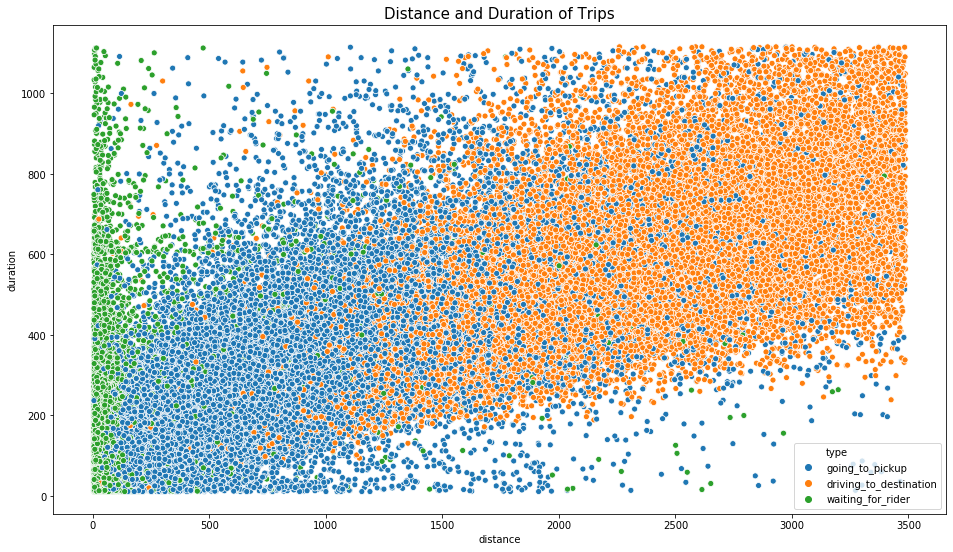

In [256]:
plt.figure(figsize = (16,9))
ax = sns.scatterplot(x = 'distance', y = 'duration', hue = 'type',
                    data = df_new)
ax.set_title('Distance and Duration of Trips', fontsize = 15)

Text(0.5, 1.0, 'Trips Based on Distance')

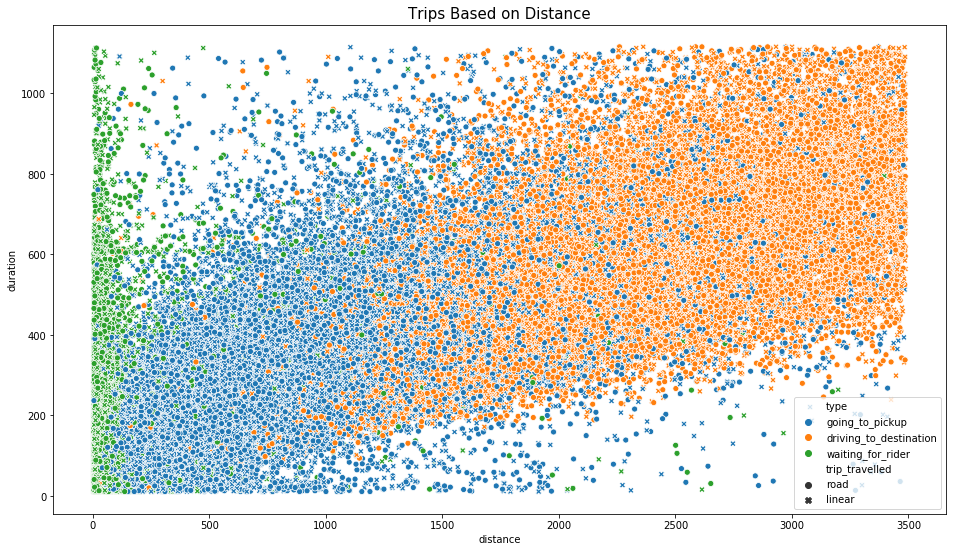

In [257]:
plt.figure(figsize = (16,9))
ax = sns.scatterplot(x = 'distance', y = 'duration', hue = 'type',
                    style = 'trip_travelled', data = df_new)
ax.set_title('Trips Based on Distance', fontsize = 15)

Text(0.5, 1.0, 'Linear Trips')

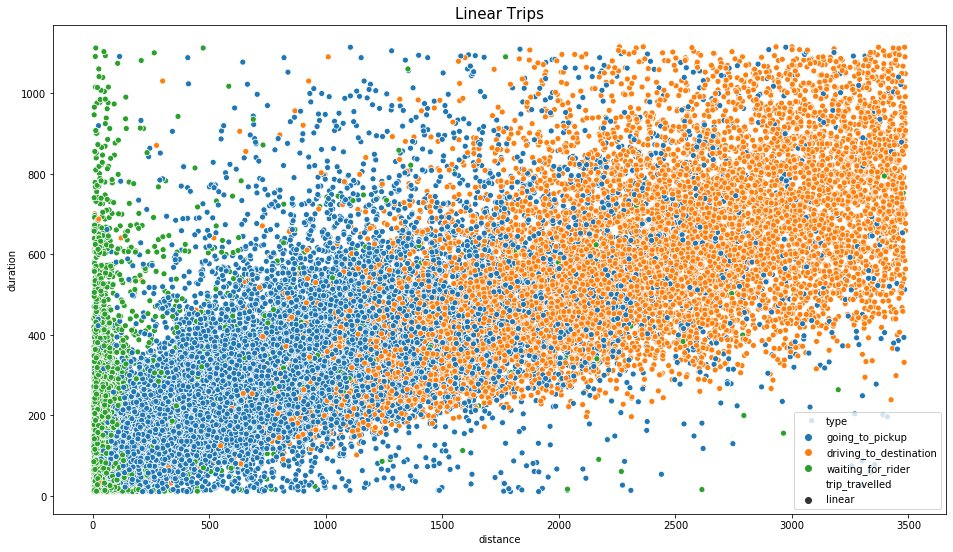

In [258]:
plt.figure(figsize = (16,9))
ax = sns.scatterplot(x = 'distance', y = 'duration', hue = 'type',
                 style = 'trip_travelled',
                    data = df_new.loc[df_new['trip_travelled'] == 'linear'])
ax.set_title('Linear Trips', fontsize = 15)

Text(0.5, 1.0, 'Road Trips')

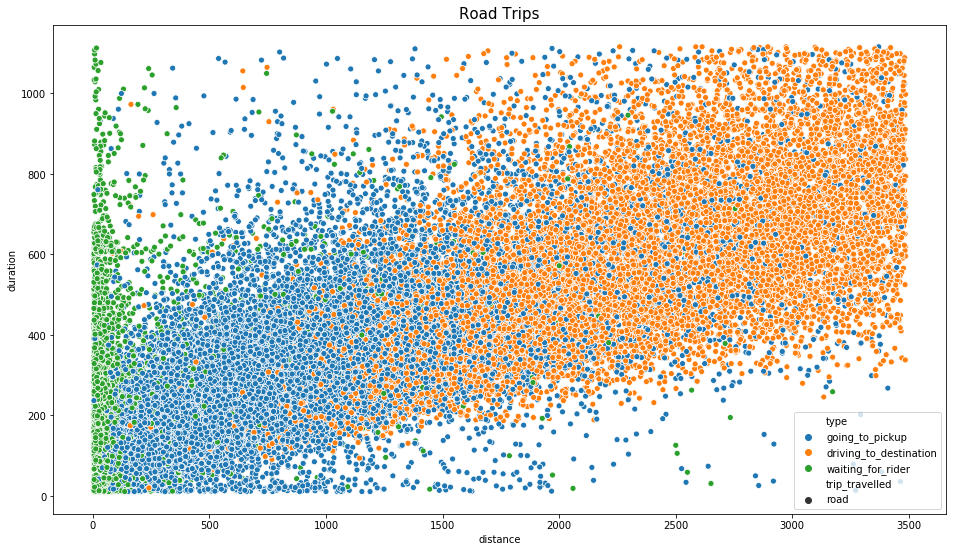

In [259]:
plt.figure(figsize = (16,9))
ax = sns.scatterplot(x = 'distance', y = 'duration', hue = 'type',
                 style = 'trip_travelled',
                    data = df_new.loc[df_new['trip_travelled'] == 'road'])
ax.set_title('Road Trips', fontsize = 15)

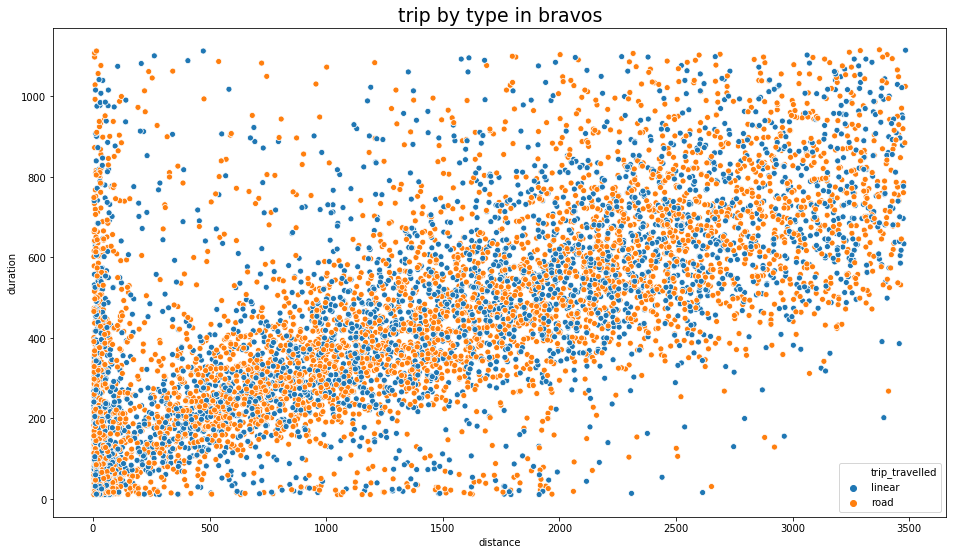

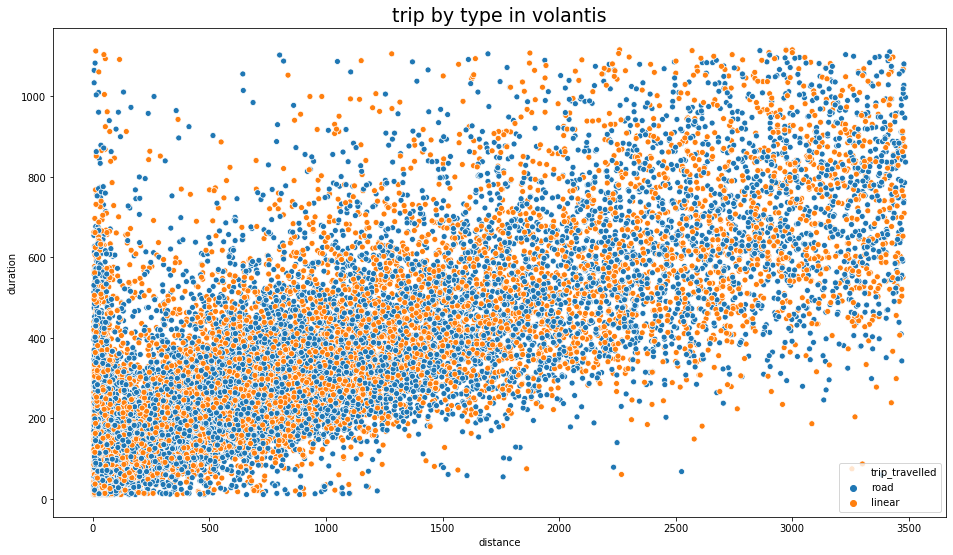

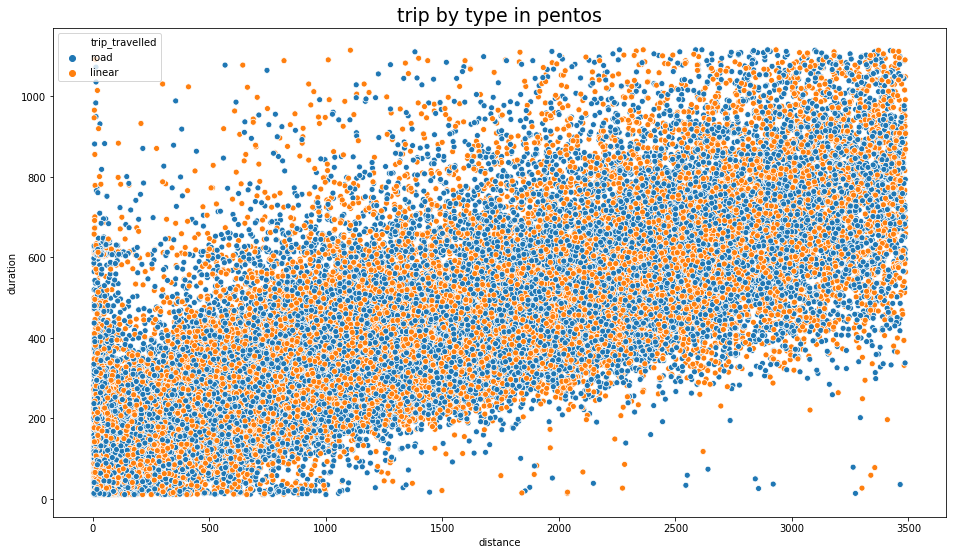

In [260]:
location = ['bravos', 'volantis', 'pentos']

for i in location:
    plt.figure(figsize = (16,9))
    ax = sns.scatterplot(x = 'distance', y = 'duration', hue = 'trip_travelled', 
                        #style = 'trip_travelled', 
                         data = df_new.loc[df_new['city_id'] == i])
    ax.set_title(f'trip by type in {i}', fontsize = 19)
    

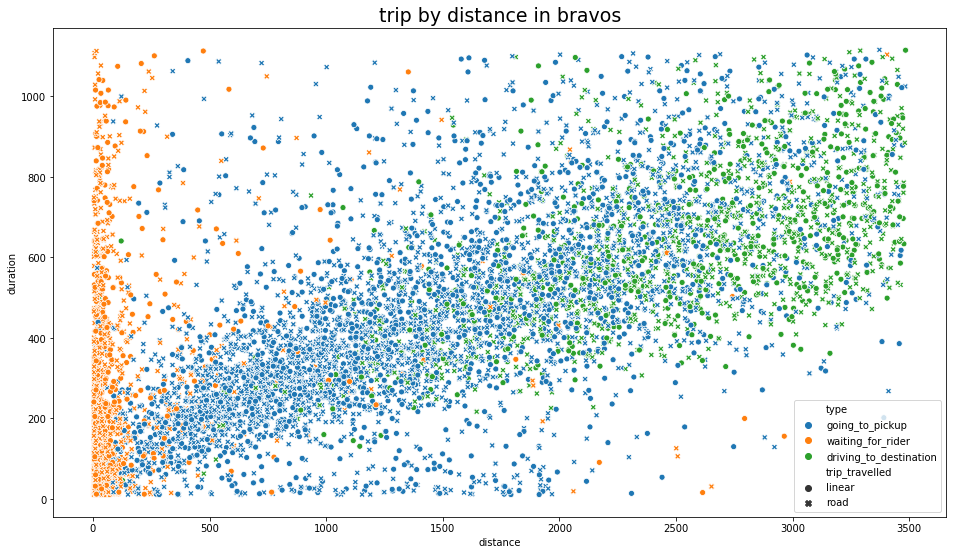

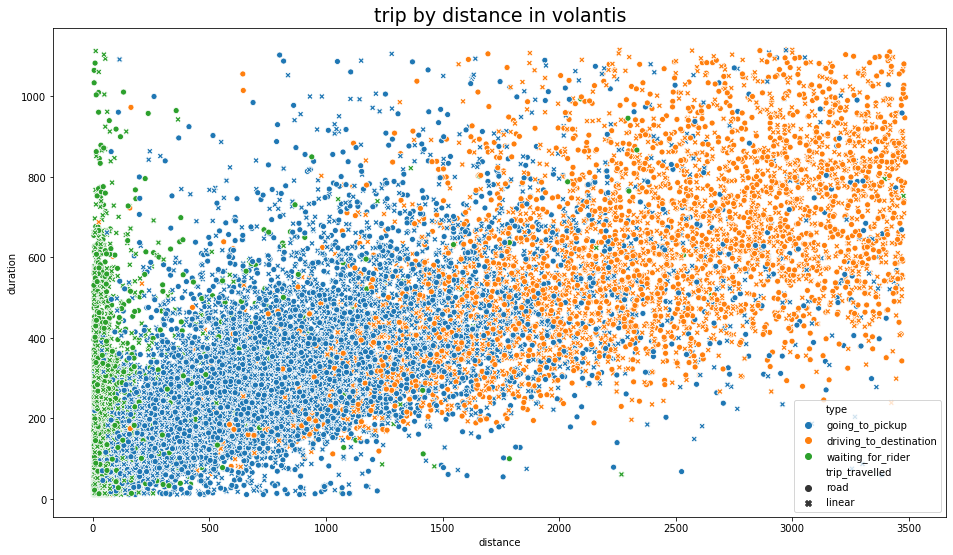

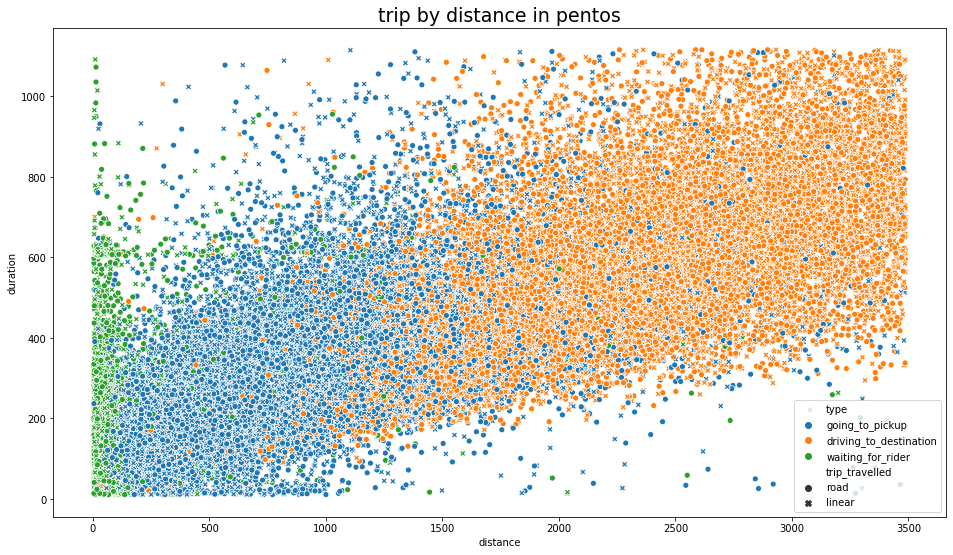

In [261]:
location = ['bravos', 'volantis', 'pentos']

for i in location:
    plt.figure(figsize = (16,9))
    ax = sns.scatterplot(x = 'distance', y = 'duration', hue = 'type', 
                        style = 'trip_travelled', 
                         data = df_new.loc[df_new['city_id'] == i])
    ax.set_title(f'trip by distance in {i}', fontsize = 19)
    

Drivers tend to drive quickly when they are going to pickup, but more slowly when driving to their destination

Text(0.5, 1.0, 'Speed relative to Type of Pickup')

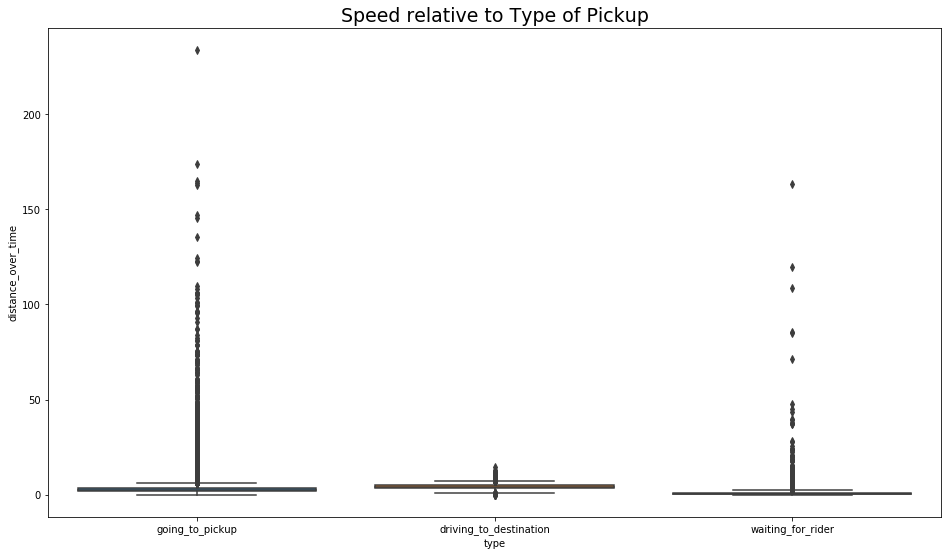

In [262]:
plt.figure(figsize = (16,9))
ax = sns.boxplot(x = 'type', y = 'distance_over_time', data = df_new)
ax.set_title('Speed relative to Type of Pickup', fontsize = 19)

The most frequent times of travel are typically between 13h to 19h.

Text(0.5, 1.0, 'Time at Which Travel Started')

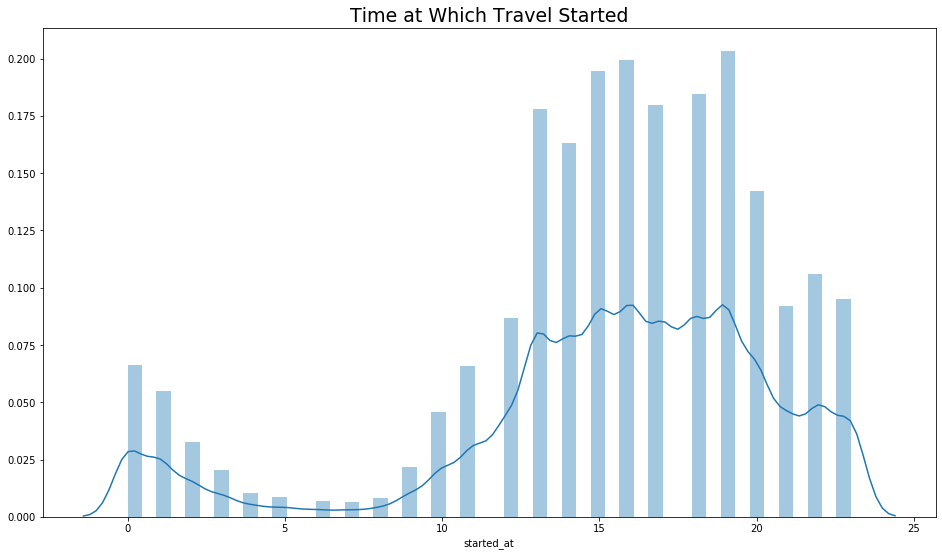

In [263]:
plt.figure(figsize = (16,9))
ax = sns.distplot(df_new.started_at.dt.hour)
ax.set_title('Time at Which Travel Started', fontsize = 19)

Text(0, 0.5, 'Hour')

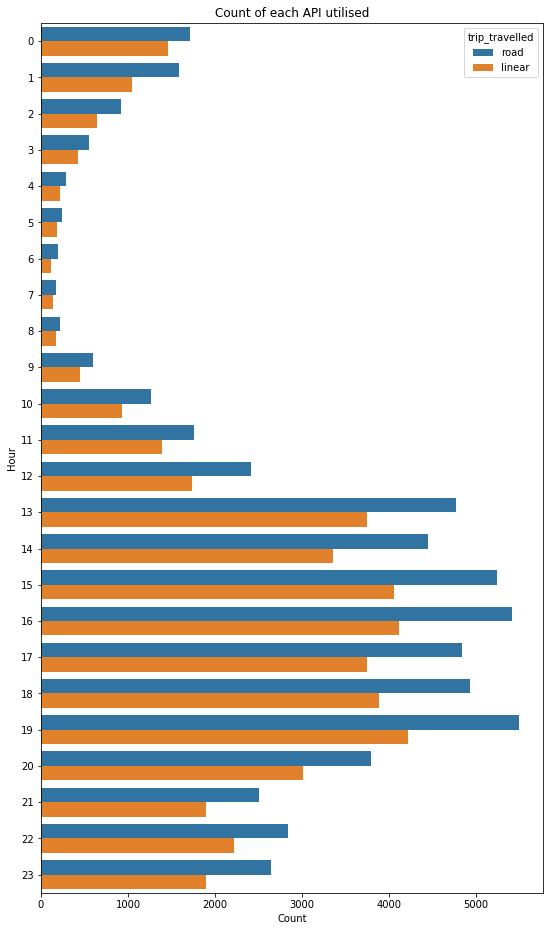

In [264]:
plt.figure(figsize = (9,16))
ax = sns.countplot(y = df_new.started_at.dt.hour, hue = 'trip_travelled',
                  data = df_new)
ax.set_title('Count of each API utilised')
ax.set_xlabel('Count')
ax.set_ylabel('Hour')

The greatest amount of travel generally occurs in Pentos, followed by Voltanis and Bravos.

Text(0, 0.5, 'Hour')

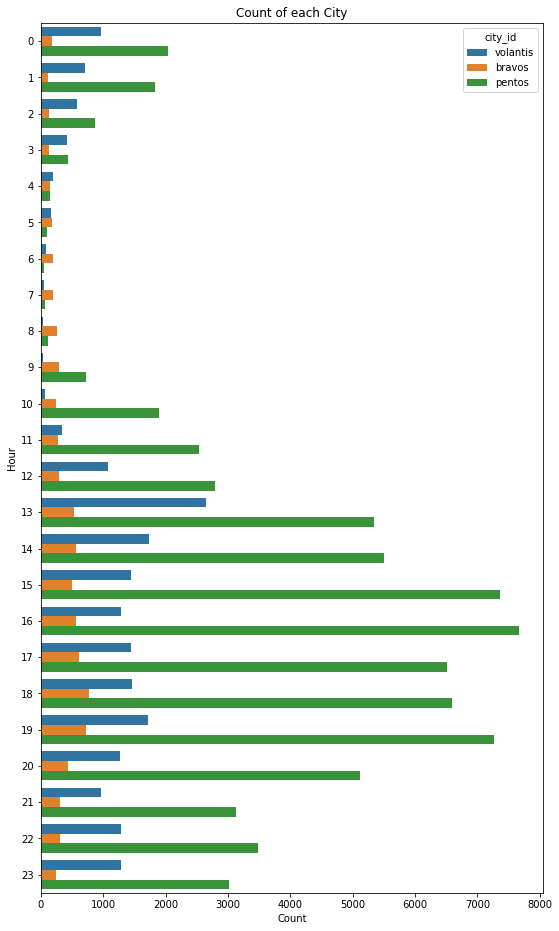

In [265]:
plt.figure(figsize = (9,16))
ax = sns.countplot(y = df_new.started_at.dt.hour, hue = 'city_id',
                  data = df_new)
ax.set_title('Count of each City')
ax.set_xlabel('Count')
ax.set_ylabel('Hour')

In [267]:
df_2.groupby(['city_id_', 'trip_travelled_']).agg({'distance_mean':'mean'})

distance_mean
city_id_ trip_travelled_               
bravos   linear             1320.884832
         road               1318.676238
pentos   linear              995.065072
         road               1009.762522
volantis linear             1048.833481
         road               1013.195801

As you can see above, there is generally very little difference between measuring by mean "road" distance travelled in comparison to mean "linear" distance travelled, across all of the cities. The greatest difference occurs in Pentos, whereby the road distance exceeds the linear measurement. 

In [218]:
df_new.groupby(['city_id', 'trip_travelled']).agg({'distance_over_time':'mean'})

distance_over_time
city_id  trip_travelled                    
bravos   linear                    3.674054
         road                      3.651377
pentos   linear                    2.746732
         road                      2.781744
volantis linear                    2.596495
         road                      2.640686

As you can see above, there is generally very little difference between measuring by mean "road" distance in comparison to mean "linear" distance, across all of the cities. The greatest difference occurs in Voltanis, whereby the road measurement exceeds the linear measurement. 

In [281]:
df_2['distance_mean'] = df_2.distance_mean/1000

In [282]:
df_2['duration_mean'] = df_2.duration_mean/60

In [283]:
df_2

city_id_ trip_travelled_                   type_  time_taken_  \
0      bravos          linear  driving_to_destination            0   
1      bravos          linear  driving_to_destination            1   
2      bravos          linear  driving_to_destination            2   
3      bravos          linear  driving_to_destination            3   
4      bravos          linear  driving_to_destination            4   
..        ...             ...                     ...          ...   
426  volantis            road       waiting_for_rider           19   
427  volantis            road       waiting_for_rider           20   
428  volantis            road       waiting_for_rider           21   
429  volantis            road       waiting_for_rider           22   
430  volantis            road       waiting_for_rider           23   

     distance_max  distance_mean  distance_min  distance_std  duration_max  \
0          3396.0       2.491267        1524.0    630.438449         759.0   
1          3232.0       2.726667        1500.0    635.414038         869.0   
2          2874.0       2.066500        1635.0    562.262394         626.0   
3          2523.0       2.002750        1408.0    457.225236         481.0   
4          3472.0       2.650538        1375.0    591.375320         947.0   
..            ...            ...           ...           ...           ...   
426         939.0       0.058751           4.0    123.691132        1011.0   
427        1115.0       0.065187           4.0    136.649224        1065.0   
428        2534.0       0.091550           4.0    258.246225         774.0   
429        2093.0       0.061802           4.0    194.188093         994.0   
430        1787.0       0.076347           4.0    222.285501         749.0   

     duration_mean  duration_min  duration_std  
0         8.863333         235.0    111.402231  
1         9.616667         371.0    176.052549  
2         9.037500         442.0     79.214372  
3         6.129167         251.0     97.376845  
4         9.121795         227.0    187.601699  
..             ...           ...           ...  
426       2.338520          11.0    161.643018  
427       2.813826          11.0    176.007384  
428       2.521905          11.0    161.299136  
429       2.459736          11.0    168.485367  
430       2.389595          11.0    159.015770  

[431 rows x 12 columns]

In [284]:
df_2.groupby(['city_id_', 'trip_travelled_']).agg({'distance_mean':'mean',
                                                  'duration_mean':'mean'})

distance_mean  duration_mean
city_id_ trip_travelled_                              
bravos   linear                1.320885       7.084015
         road                  1.318676       7.009926
pentos   linear                0.995065       4.632781
         road                  1.009763       4.741424
volantis linear                1.048833       5.364611
         road                  1.013196       5.291534

In [286]:
peak_time = df_2[(df_2['time_taken_'] == 17) | (df_2['time_taken_'] == 19)]

In [289]:
peak_time.head()

city_id_ trip_travelled_                   type_  time_taken_  \
17   bravos          linear  driving_to_destination           17   
19   bravos          linear  driving_to_destination           19   
41   bravos          linear         going_to_pickup           17   
43   bravos          linear         going_to_pickup           19   
65   bravos          linear       waiting_for_rider           17   

    distance_max  distance_mean  distance_min  distance_std  duration_max  \
17        3458.0       2.517500        1006.0    682.730469        1085.0   
19        3475.0       2.496275         748.0    720.754810        1097.0   
41        3461.0       1.516071          22.0    861.752409        1103.0   
43        3391.0       1.364170          14.0    719.898626         890.0   
65        2614.0       0.132559           4.0    365.033893        1061.0   

    duration_mean  duration_min  duration_std  
17      11.854167         233.0    218.077334  
19       9.634783         282.0    173.019613  
41       7.511004          11.0    274.014351  
43       6.863333          12.0    193.842883  
65       3.254657          11.0    223.393558

In [293]:
peak_time.groupby(['city_id_', 'trip_travelled_']).agg({'distance_mean':'mean',
                                                  'duration_mean':'mean'})

distance_mean  duration_mean
city_id_ trip_travelled_                              
bravos   linear                1.357907       7.010850
         road                  1.316626       6.776801
pentos   linear                0.953450       5.055898
         road                  0.960427       5.069157
volantis linear                0.993250       5.851043
         road                  1.014690       5.688568

### Conclusion

During peak hours, such as 17hr and 19hr, it would perhaps be better to switch to the linear API in order to gain more profitability in Bravos and Volantis, as the duration_mean is higher.

The model needs refinement relative to the city that it takes place in. For example, if a city tends to have more motorways / generally faster roads, the API should be tailored towards that city, in particular because the duration of travel will be altered.

A greater geolocation breakdown of the city is needed to identify points at which the greatest traffic occurs, thereby allowing us to perhaps tailor the API used based on the drivers location with the city or which city as whole. 

Analysing data over a longer period of time is needed. Also perhaps calibration of the speedometers within the cars are needed due to the deviations we have found